In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import xarray as xr
import seaborn as sns
sns.set()

#### Check surface fluxes of CO$_2$

In [2]:
# check the data folder to swith to another mixing conditions
#ds = xr.open_dataset('data/results_so4_adv/5_po75-25_di10e-9/water.nc')
ds = xr.open_dataset('data/results_so4_adv/9_po75-25_di30e-9/water.nc')
#ds = xr.open_dataset('data/no_denitrification/water.nc')
dicflux_df = ds['B_C_DIC   _flux'].to_dataframe()
oxyflux_df = ds['B_BIO_O2  _flux'].to_dataframe()
dicflux_surface = dicflux_df.groupby('z_faces').get_group(0)
oxyflux_surface = oxyflux_df.groupby('z_faces').get_group(0)
dicflux_surface_year = dicflux_surface.loc['2011-01-01':'2011-12-31']
oxyflux_surface_year = oxyflux_surface.loc['2011-01-01':'2011-12-31']

In [3]:
ox = np.arange(1,366,1)

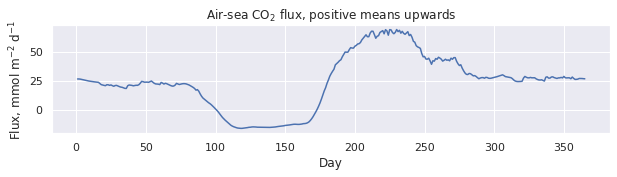

In [4]:
plt.plot(ox, dicflux_surface_year); plt.gcf().set_size_inches(10, 2);
plt.title('Air-sea CO$_2$ flux, positive means upwards');
plt.xlabel('Day'); plt.ylabel('Flux, mmol m$^{-2}$ d$^{-1}$');

#### Advective TA exchange

These are data on how alkalinity in the Wadden Sea changes due to mixing with the North Sea. Positive means alkalinity comes from the North Sea, negative - goes to the North Sea.

In [5]:
nh4ta_df = ds['TA_due_to_NH4'].to_dataframe()
no3ta_df = ds['TA_due_to_NO3'].to_dataframe()
po4ta_df = ds['TA_due_to_PO4'].to_dataframe()
so4ta_df = ds['TA_due_to_SO4'].to_dataframe()

In [6]:
nh4ta_year = nh4ta_df.loc['2011-01-01':'2011-12-31']
no3ta_year = no3ta_df.loc['2011-01-01':'2011-12-31']
po4ta_year = po4ta_df.loc['2011-01-01':'2011-12-31']
so4ta_year = so4ta_df.loc['2011-01-01':'2011-12-31']

In [7]:
nh4ta = np.array(nh4ta_year.TA_due_to_NH4.values)
no3ta = np.array(no3ta_year.TA_due_to_NO3.values)
po4ta = np.array(po4ta_year.TA_due_to_PO4.values)
so4ta = np.array(so4ta_year.TA_due_to_SO4.values)
total = nh4ta+no3ta+po4ta+so4ta

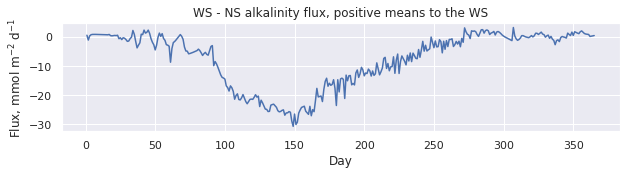

In [8]:
plt.plot(ox, total); plt.gcf().set_size_inches(10, 2);
plt.title('WS - NS alkalinity flux, positive means to the WS');
plt.xlabel('Day'); plt.ylabel('Flux, mmol m$^{-2}$ d$^{-1}$');

In [9]:
year = (('2011-01-01','2011-01-31'), ('2011-02-01','2011-02-28'), ('2011-03-01','2011-03-31'), ('2011-04-01','2011-04-30'), 
        ('2011-05-01','2011-05-31'), ('2011-06-01','2011-06-30'), ('2011-07-01','2011-07-31'), ('2011-08-01','2011-08-31'),
        ('2011-09-01','2011-09-30'), ('2011-10-01','2011-10-31'), ('2011-11-01','2011-11-30'), ('2011-12-01','2011-12-31'))

In [10]:
nh4ta_year = []
no3ta_year = []
po4ta_year = []
so4ta_year = []
for month in year:
    nh4ta_month = nh4ta_df.loc[month[0]:month[1]]
    no3ta_month = no3ta_df.loc[month[0]:month[1]]
    po4ta_month = po4ta_df.loc[month[0]:month[1]]
    so4ta_month = so4ta_df.loc[month[0]:month[1]]
    nh4ta_year.append(nh4ta_month['TA_due_to_NH4'].sum())
    no3ta_year.append(no3ta_month['TA_due_to_NO3'].sum())
    po4ta_year.append(po4ta_month['TA_due_to_PO4'].sum())
    so4ta_year.append(so4ta_month['TA_due_to_SO4'].sum())

In [11]:
nh4ta = np.array(nh4ta_year)
no3ta = np.array(no3ta_year)
po4ta = np.array(po4ta_year)
so4ta = np.array(so4ta_year)
total = nh4ta+no3ta+po4ta+so4ta

here and further, units: mmol m$^{-2}$

In [12]:
nh4ta

array([ -54.0542  ,  -47.311172,  -96.97839 , -212.58965 , -322.50854 ,
       -284.83557 , -259.0225  , -239.78052 , -142.01068 ,  -83.39478 ,
        -71.85164 ,  -70.839714], dtype=float32)

In [13]:
sum(nh4ta)

-1885.1773529052734

In [14]:
no3ta

array([  15.989281 ,   15.203659 ,  -33.10121  , -284.2176   ,
       -366.508    , -197.85835  ,  -39.343414 ,    4.2882004,
          6.486219 ,   13.415098 ,  -14.222749 ,   -1.4310662],
      dtype=float32)

In [15]:
sum(no3ta)

-881.2999221086502

In [16]:
po4ta

array([ 5.401703 ,  5.7428184,  4.8627286, -5.3070583, -3.494325 ,
        3.9444864, 13.473463 , 15.548128 , 10.093646 ,  6.906582 ,
        5.4743567,  6.5176563], dtype=float32)

In [17]:
sum(po4ta)

69.16418504714966

In [18]:
so4ta

array([  39.84104 ,   11.560484,    1.833623,  -10.417354,  -74.389984,
       -161.6031  , -131.90381 ,  -21.649607,   61.980103,   98.585976,
         88.464966,   77.36035 ], dtype=float32)

In [19]:
sum(so4ta)

-20.33731257915497

In [20]:
total

array([   7.177826 ,  -14.804211 , -123.38325  , -512.5317   ,
       -766.9009   , -640.35254  , -416.79626  , -241.5938   ,
        -63.450714 ,   35.512875 ,    7.864937 ,   11.6072235],
      dtype=float32)

In [21]:
sum(total)

-2717.6504669189453